In [1]:
#### python
import os
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import coffea.util
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.161.144:8786' processes=60 threads=60, memory=173.23 GiB>

In [3]:
runner = processor.Runner(
    # executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client),
    # schema=NanoAODSchema,
    schema = llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)
channels = [
    # "baseNoLj", 
    "baseNoLj_A_mumu_highPtA", 
    "baseNoLj_A_mumu_matched_lj_highPT",
    "baseNoLj_A_mumu_matched_lj_highPT_iso",
    "baseNoLj_A_mumu_matched_lj_highPT_iso_disp"
    
    
        
           ]

p = sidm_processor.SidmProcessor(
    channels,
    ["lj_reco_effi_base", ],
)

In [4]:
 samples = [

     '2Mu2E_500GeV_0p25GeV_4p0mm',
     '2Mu2E_500GeV_1p2GeV_19p0mm',
     '2Mu2E_500GeV_5p0GeV_80p0mm',
     

    
]
fileset = utilities.make_fileset(samples, "llpNanoAOD_v2", max_files=-1, location_cfg="signal_2mu2e_v10.yaml")

                            

output_signal = runner.run(fileset, treename="Events", processor_instance=p)
coffea.util.save(output_signal, "output_files/output_signal_effi_muons_lxy.coffea"  )


Output()

Output()

2Mu2E_500GeV_5p0GeV_80p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_0p25GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_1p2GeV_19p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divi

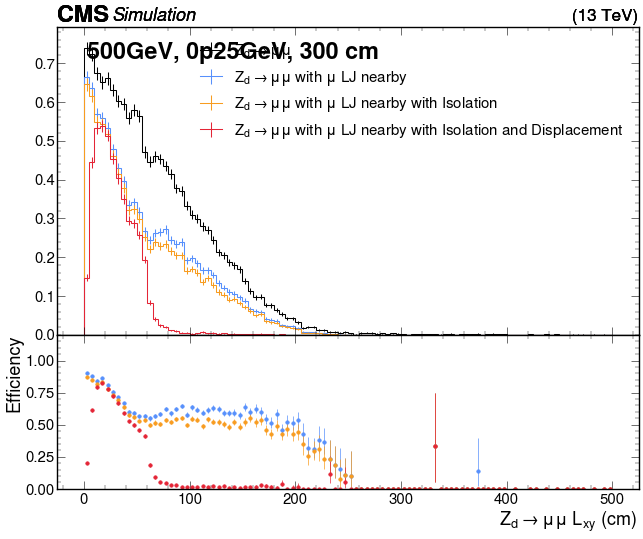

In [5]:

hists = output_signal["out"]["2Mu2E_500GeV_0p25GeV_4p0mm"]["hists"]
ch1 = "baseNoLj_A_mumu_highPtA"
ch2 = "baseNoLj_A_mumu_matched_lj_highPT"
ch3 = "baseNoLj_A_mumu_matched_lj_highPT_iso"
ch4 = "baseNoLj_A_mumu_matched_lj_highPT_iso_disp"
histogram = "genAs_toMu_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow \mu\mu $",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation and Displacement"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio2 (num_list,den,legend =legend, text = "500GeV, 0p25GeV, 300 cm")
    # save_path = os.path.join(folder_name, filename)         
    
    # plt.savefig(save_path)

    

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divi

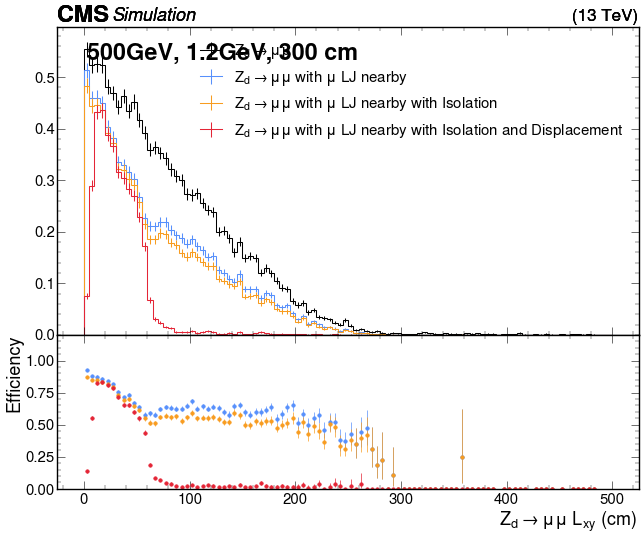

In [6]:
hists = output_signal["out"]["2Mu2E_500GeV_1p2GeV_19p0mm"]["hists"]
ch1 = "baseNoLj_A_mumu_highPtA"
ch2 = "baseNoLj_A_mumu_matched_lj_highPT"
ch3 = "baseNoLj_A_mumu_matched_lj_highPT_iso"
ch4 = "baseNoLj_A_mumu_matched_lj_highPT_iso_disp"
histogram = "genAs_toMu_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow \mu\mu $",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation and Displacement"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio2 (num_list,den,legend =legend, text = "500GeV, 1.2GeV, 300 cm")
    # save_path = os.path.join(folder_name, filename)         
    
    # plt.savefig(save_path)

    

/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divide
  eff_values = num_vals/denom_vals
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:164: RuntimeWarning: invalid value encountered in divide
  denom_counts = denom_vals**2 / denom_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:158: RuntimeWarning: invalid value encountered in divi

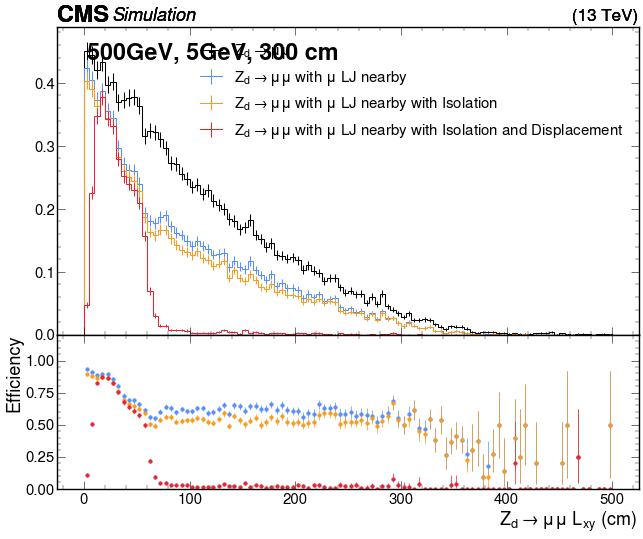

In [7]:
hists = output_signal["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]
ch1 = "baseNoLj_A_mumu_highPtA"
ch2 = "baseNoLj_A_mumu_matched_lj_highPT"
ch3 = "baseNoLj_A_mumu_matched_lj_highPT_iso"
ch4 = "baseNoLj_A_mumu_matched_lj_highPT_iso_disp"
histogram = "genAs_toMu_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow \mu\mu $",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation",
r"$Z_d \rightarrow \mu\mu$ with $\mu$ LJ nearby with Isolation and Displacement"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio2 (num_list,den,legend =legend, text = "500GeV, 5GeV, 300 cm")
    # save_path = os.path.join(folder_name, filename)         
    
    # plt.savefig(save_path)

    